## Loading a pretrained model:

We'll use the functions in the 'models.py' file.

In [18]:
from model import get_model, get_device

model = get_model(2)

## Visualising the results

We'll create an instance of the `DrawMasks` class from `visual_utils.py`.

In [20]:
from visual_utils import DrawMasks
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights

visualiser = DrawMasks(model, transforms=MaskRCNN_ResNet50_FPN_Weights.DEFAULT.transforms(), device=get_device())

## Testing the model

Let's see how the model initially performs on a test image:

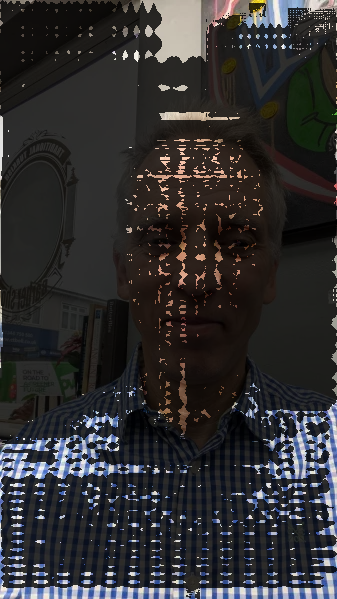

In [21]:
dave_image_path = "Datasets/test/dave_before.webp"

image = visualiser.draw_mask_from_image_path_and_model(dave_image_path)

image

Not great, so we need to fine-tune the model.

## Defining the datasets

We define a training and validation dataset, using the class `HairDataset` in `data_utils.py`.

In [23]:
from data_utils import HairDataset

folder_path = 'Datasets/hair-seg.v6i.coco-segmentation/'

train_dataset = HairDataset(folder_path + 'train', training_mode=True)
validation_dataset = HairDataset(folder_path + 'valid', training_mode=True)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


## Training the model

We create an instance of the `TrainModel` class from `training_loop.py` to train the model.

Uncomment the commented lines to train the model.

In [24]:
from training_loop import TrainModel

training_loop = TrainModel(model, train_dataset, validation_dataset)

#training_loop.train_n_epochs(batch_size=2, num_epochs=10, initial_learning_rate=0.01)

#training_loop.save_model_parameters('app/Model_Weights.pt')

model = training_loop.get_model()

In [25]:
import torch

state_dict = torch.load('app/Model_Weights.pt')

model.load_state_dict(state_dict)

/tmp/ipykernel_211834/4056528940.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('New Model.pt')


<All keys matched successfully>

## Testing the model after training

Let's see how the model performs after training.

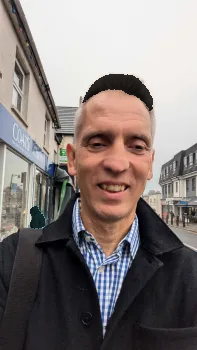

In [26]:
dave_image_path = "Datasets/test/dave_after.webp"

my_picture = "Datasets/test/photo.jpg"

image = visualiser.draw_mask_from_image_path_and_model(dave_image_path, prob_threshold=0.8)

image